# Import any file from your local PC and create a pandas dataframe

In [3]:
import pandas as pd

header_cols = ['Questions', 'A', 'B', 'C','D', 'Correct_Answer']
Q_A = pd.read_csv('C:/Q_file.csv',sep=',', names=header_cols, usecols=range(6), skiprows = [0])
Q_A.head()

#split into separate data frames
df = pd.DataFrame (Q_A)
df_q = df[['Questions']]
df_op = df [['A', 'B', 'C', 'D']]
df_a = df [['Correct_Answer']]

#convert to dictionary
q_key_tot =df_q.to_dict()
Questions = df_op.to_dict('index')
answers = df_a.to_dict()

print('The question is: ','"',q_key_tot['Questions'][0],'"')
print('Options are: ', sorted(Questions[0]))
print('Answer is:', answers['Correct_Answer'][0])

The question is:  " What is the capital of canada? "
Options are:  ['A', 'B', 'C', 'D']
Answer is: C


# Next, split into separate data frames for questions, options and correct answers

In [4]:
df = pd.DataFrame (Q_A)
df_q = df[['Questions']]
df_op = df [['A', 'B', 'C', 'D']]
df_a = df [['Correct_Answer']]

#convert to dictionary
q_key_tot =df_q.to_dict()
Questions = df_op.to_dict('index')
answers = df_a.to_dict()

print('The question is: ','"',q_key_tot['Questions'][0],'"')
for key in sorted(Questions[0]):
    print ((key, Questions[0][key]))
    
print('Answer is:', answers['Correct_Answer'][0])

The question is:  " What is the capital of canada? "
('A', 'Canberra')
('B', 'London')
('C', 'Ottawa')
('D', 'Hong Kong')
Answer is: C


#Next, prepare some positive and negative expressions for correct or wrong answers
#Need to do --pip install colored --library from python command prompt

In [7]:
import random
from colored import fg, bg, attr

positive = ('Correct!!', 'YESS','AWESOME!!', 'Fantastic', 'bravo, corret', 'correcto','excellent!!', 'Yeh','You Rock!','You r a hacker!')
negative =  ('Not Correct', 'Neh', 'Nah','Oh no, its not correct','Sorry, its not!', 'Sorry', 'I am sorry, it is not correct','Sorry, you lose!','Nuh uh' )

attribute = attr(21)
background = bg(0)
default_fg=fg(0)
reset = attr(0)
color_p = fg(random.choice([116,86,77,105])) + attribute+background
color_n = fg(random.choice([208,200, 201,196])) + attribute+background


#test print
print (color_p+random.choice(positive)+reset+fg(0))
print (color_n+random.choice(negative)+reset+fg(0))
print ('test reset')



AWESOME!!
I am sorry, it is not correct
test reset


In [6]:
import time
import random
import math


#declare questions and score variables
l1=0
l2=0
score1=0
score2 =0

#rule of game and player credentials
print ('THIS JEOPARDY CAN BE PLAYED BY TWO(2) PERSONS*****')
time.sleep(.300)
player1= input ('Enter the 1st person name*****')
player2= input ('Enter the 2nd person name*****')
player_list =  [player1, player2]

first = random.choice(player_list)
second =''
if (first ==player1):
    second = player2
else:
    second = player1

upper_q = math.floor(len(Questions)/2)
text1='How many questions each person should be asked? 1- '+str(upper_q)+'   '
n=int(input (text1))
total_questions = 2*n # total questions for both players
print ('There will be total ', total_questions, ' questions')
print ('Each will have ', n, 'questions')
print (first,' will go first')


#generate library of questions for player 1 and 2
total_list = list(range(0,len(Questions)))
random.shuffle(total_list)
list1 = total_list[0:n]
list2 = total_list[n:total_questions]

print (first,' has randomly selected questions ', list1)
print (second,' has randomly selected questions ', list2)

THIS JEOPARDY CAN BE PLAYED BY TWO(2) PERSONS*****
Enter the 1st person name*****AwesomeA
Enter the 2nd person name*****BestieB
How many questions each person should be asked? 1- 5   3
There will be total  6  questions
Each will have  3 questions
BestieB  will go first
BestieB  has randomly selected questions  [0, 1, 7]
AwesomeA  has randomly selected questions  [10, 4, 3]


#This is the main code for asking the interactive Jeopardy questions, receiving answers and updating with the correct answers
#At the end of this results are displayed in matplotlib graph

****************************************
Questions for  BestieB
What is the capital of canada?
('A', 'Canberra')
('B', 'London')
('C', 'Ottawa')
('D', 'Hong Kong')
Your Answer is _C
You r a hacker!
****************************************
Questions for  AwesomeA
What are three types of soil?
('A', 'Dirt, Sand, Clay')
('B', 'Silt, Dirt,  Muck')
('C', 'Silt, Clay, Sand')
('D', 'Doh, Clay, Mud')
Your Answer is _a
Not Correct
The Correct Answer is C
****************************************
Questions for  BestieB
How many wards in Washington, DC?
('A', '6')
('B', '16')
('C', '18')
('D', '8')
Your Answer is _d
AWESOME!!
****************************************
Questions for  AwesomeA
How many counties in Texas?
('A', '240')
('B', '203')
('C', '145')
('D', '254')
Your Answer is _d
AWESOME!!
****************************************
Questions for  BestieB
What is the atomic number of silver?
('A', '45')
('B', '47')
('C', '50')
('D', '15')
Your Answer is _b
bravo, corret
************************

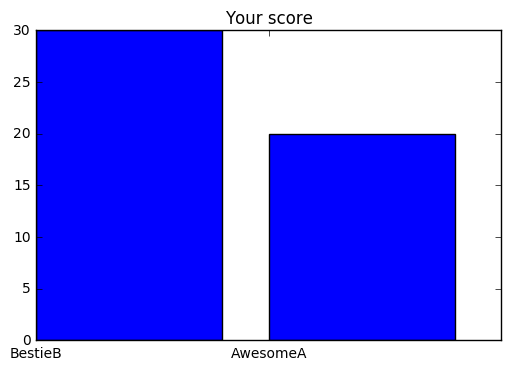

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

l1=0
l2=0
score1=0
score2 =0

def checkABCD(answer):
    if (answer.upper() not in ['A','B','C','D']):
        print ('Answer must be one of these: a,b,c,d')
        return 0
    else:
        return 1

for j in range (total_questions):
        if (j%2==0):
            print ('**'*20)
            print ('Questions for ', first)
            print(q_key_tot['Questions'][list1[l1]])
            for key in sorted(Questions[list1[l1]]):
                print ((key, Questions[list1[l1]][key]))
            ans = input('Your Answer is _')
            if (checkABCD(ans) ==0):
                ans = input(Questions[list1[l1]])
            if (ans.upper() ==answers['Correct_Answer'][list1[l1]]):
                print (color_p+random.choice(positive)+reset+fg(0))
                score1 = 10+score1
            else:
                print (color_n+random.choice(negative)+reset+fg(0))
                print ("The Correct Answer is",answers['Correct_Answer'][list1[l1]])
            l1=l1+1
        else:
            print ('**'*20)
            print ('Questions for ', second)
            print(q_key_tot['Questions'][list2[l2]])
            for key in sorted(Questions[list2[l2]]):
                print ((key, Questions[list2[l2]][key]))
            ans = input('Your Answer is _')
            if (checkABCD(ans) ==0):
                ans = input(Questions[list2[l2]])
            if (ans.upper() ==answers['Correct_Answer'][list2[l2]]):
                print (color_p+random.choice(positive)+reset+fg(0))
                score2 = 10+score2
            else:
                print (color_n+random.choice(negative)+reset+fg(0))
                print ("The Correct Answer is",answers['Correct_Answer'][list2[l2]])
            l2=l2+1
print ('**'*20)
print ('TOTAL NUMBER FOR ',first, 'is ',score1)
print ('TOTAL NUMBER FOR ',second, 'is ',score2)
print ('**'*20)
if (score1>score2):
    print (first,' is the WINNER')
elif (score1<score2):
    print (second,' is the WINNER')
else:
    print ('You both are WINNERS')

y = [score1, score2]
x =[1,2]
colors = ['r', 'g']
labels = [first, second]
plt.bar(x, y)
plt.xticks(x, (first, second))
plt.title('Your score')
plt.show()